In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import numpy as np
path = "/content/drive/My Drive/ML Data"

os.chdir(path)
os.listdir(path)


['Flickr', 'data', 'resize_images_100']

In [0]:
import tensorflow as tf
import os
import random

RGB


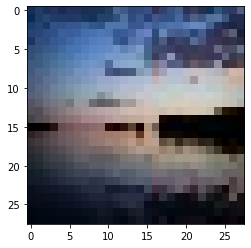

In [0]:
from PIL import Image
import matplotlib.pyplot as plt


img = Image.open("resize_images_28/awe/awe_0000_resized.jpg")
print(img.mode)
plt.figure("img")
plt.imshow(img)
plt.show()


In [0]:
source_file="./Flickr/amusement/"       #original file address
target_file="./resize_images_100/amusement/"  #file address of resized file 
 
if not os.path.exists(target_file):  #create a file path if it is not exist
    os.makedirs(target_file)
 
file_list=os.listdir(source_file)   #load the original file address
for i in range(len(file_list)):
  with tf.Session() as sess:
    image_raw_data=tf.gfile.FastGFile(source_file+file_list[i],"rb").read()#load image
    print("Processing：",file_list[i])
    image_data=tf.image.decode_jpeg(image_raw_data)
    resized = tf.image.resize_images(image_data, [100, 100], method=0)
    resized = np.asarray(resized.eval(), dtype='uint8')
    image_resized = tf.image.encode_jpeg(resized)
    img_resized = sess.run(image_resized)

  with tf.gfile.GFile(target_file+file_list[i][:-4]+"_resized"+".jpg","wb") as f:
    f.write(img_resized)